Example 1

In [274]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=120, centers=4, n_features=2, cluster_std=0.4)
print(X.shape)
print(y.shape)

(120, 2)
(120,)


(4, 2)


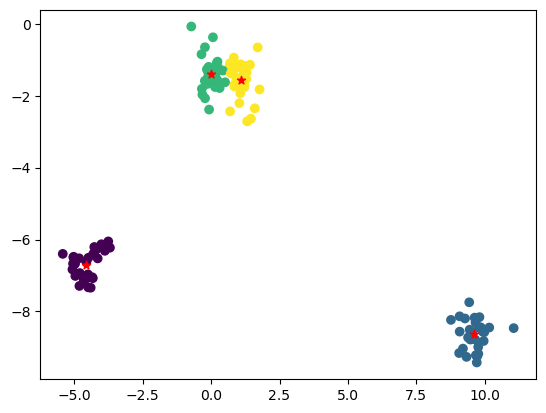

In [275]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=4)
clf.fit(X)
print(clf.cluster_centers_.shape)
plt.scatter(X[:,0],X[:,1],c=clf.labels_)
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],c='red',marker='*')
plt.show()

In [276]:
print(clf.inertia_)

37.89413460457362


Example 2

In [277]:
X, y = make_blobs(n_samples=200, centers=5, n_features=2, cluster_std=0.8)
print(X.shape)
print(y.shape)

(200, 2)
(200,)


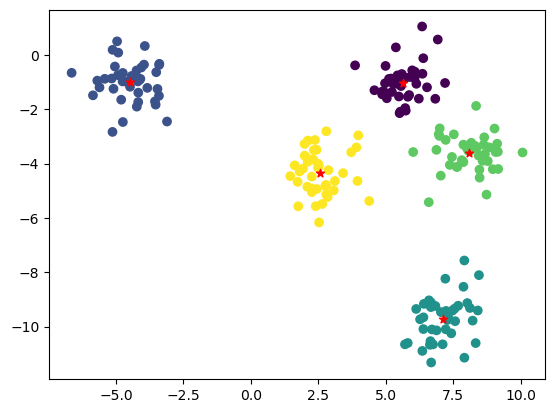

Inertia:  215.79682700927066


In [278]:
clf = KMeans(n_clusters=5)
clf.fit(X)
# print(clf.cluster_centers_.shape)
plt.scatter(X[:,0],X[:,1],c=clf.labels_)
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],c='red',marker='*')
plt.show()
print("Inertia: ",clf.inertia_)

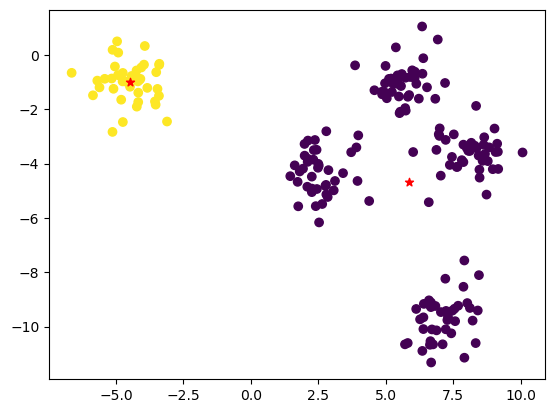

Inertia:  2512.055341027927


In [279]:
clf = KMeans(n_clusters=2)
clf.fit(X)
# print(clf.cluster_centers_.shape)
plt.scatter(X[:,0],X[:,1],c=clf.labels_)
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],c='red',marker='*')
plt.show()
print("Inertia: ",clf.inertia_)

K-means ++

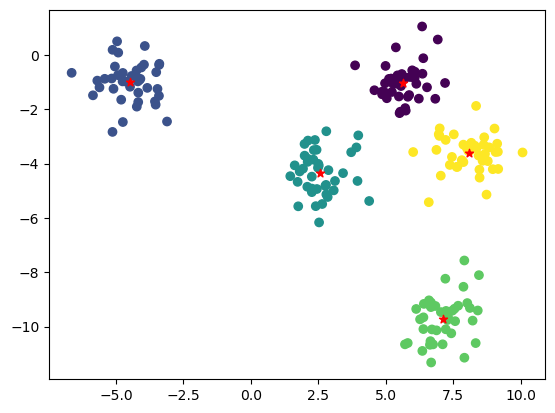

Inertia:  215.79682700927066


In [280]:
clf = KMeans(n_clusters=5,init='k-means++')
clf.fit(X)
# print(clf.cluster_centers_.shape)
plt.scatter(X[:,0],X[:,1],c=clf.labels_)
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],c='red',marker='*')
plt.show()
print("Inertia: ",clf.inertia_)

Elbow method

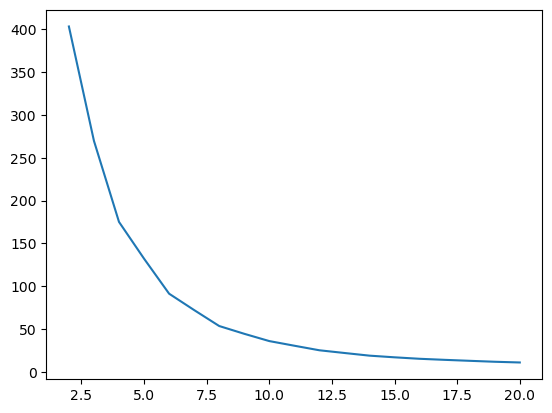

In [281]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

inertia_list = []

for i in range(2,21):
    clf = KMeans(n_clusters=i,init='k-means++')
    clf.fit(X_moon)
    inertia_list.append(clf.inertia_)

plt.plot(range(2,21),inertia_list)
plt.show()

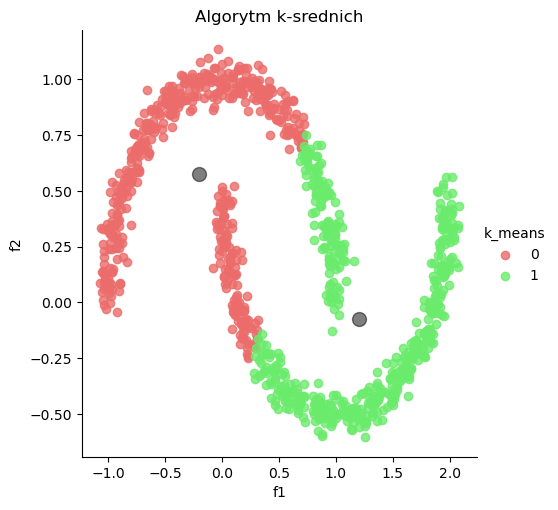

In [282]:
clf = KMeans(n_clusters=2,init='k-means++')
clf.fit(X_moon)
centers = clf.cluster_centers_
y_km = clf.predict(X_moon)

X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()


**Clustering II - hierarchical methods**

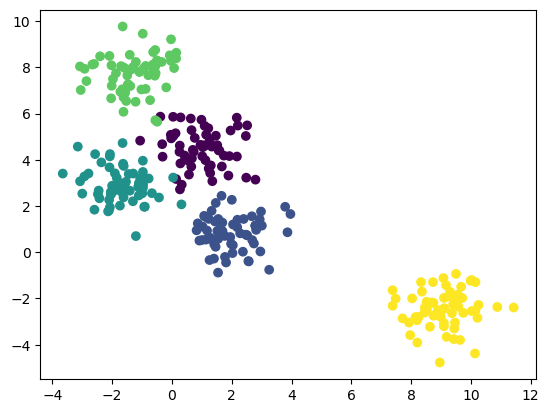

In [283]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

plt.scatter(X[:,0],X[:,1],c=y_true)
plt.show()


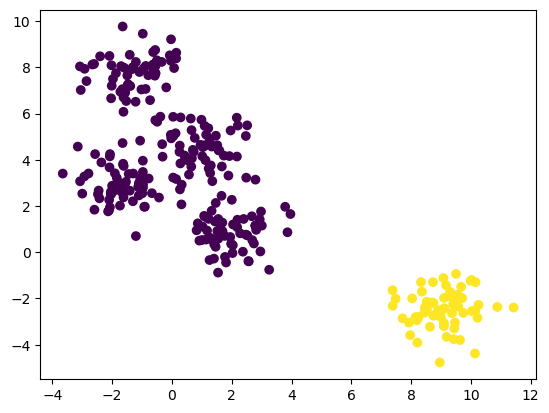

Inertia:  2457.777803248986


In [284]:
clf = KMeans(n_clusters=2)
clf.fit(X)
# print(clf.cluster_centers_.shape)
plt.scatter(X[:,0],X[:,1],c=clf.labels_)
# plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],c='red',marker='*')
plt.show()
print("Inertia: ",clf.inertia_)

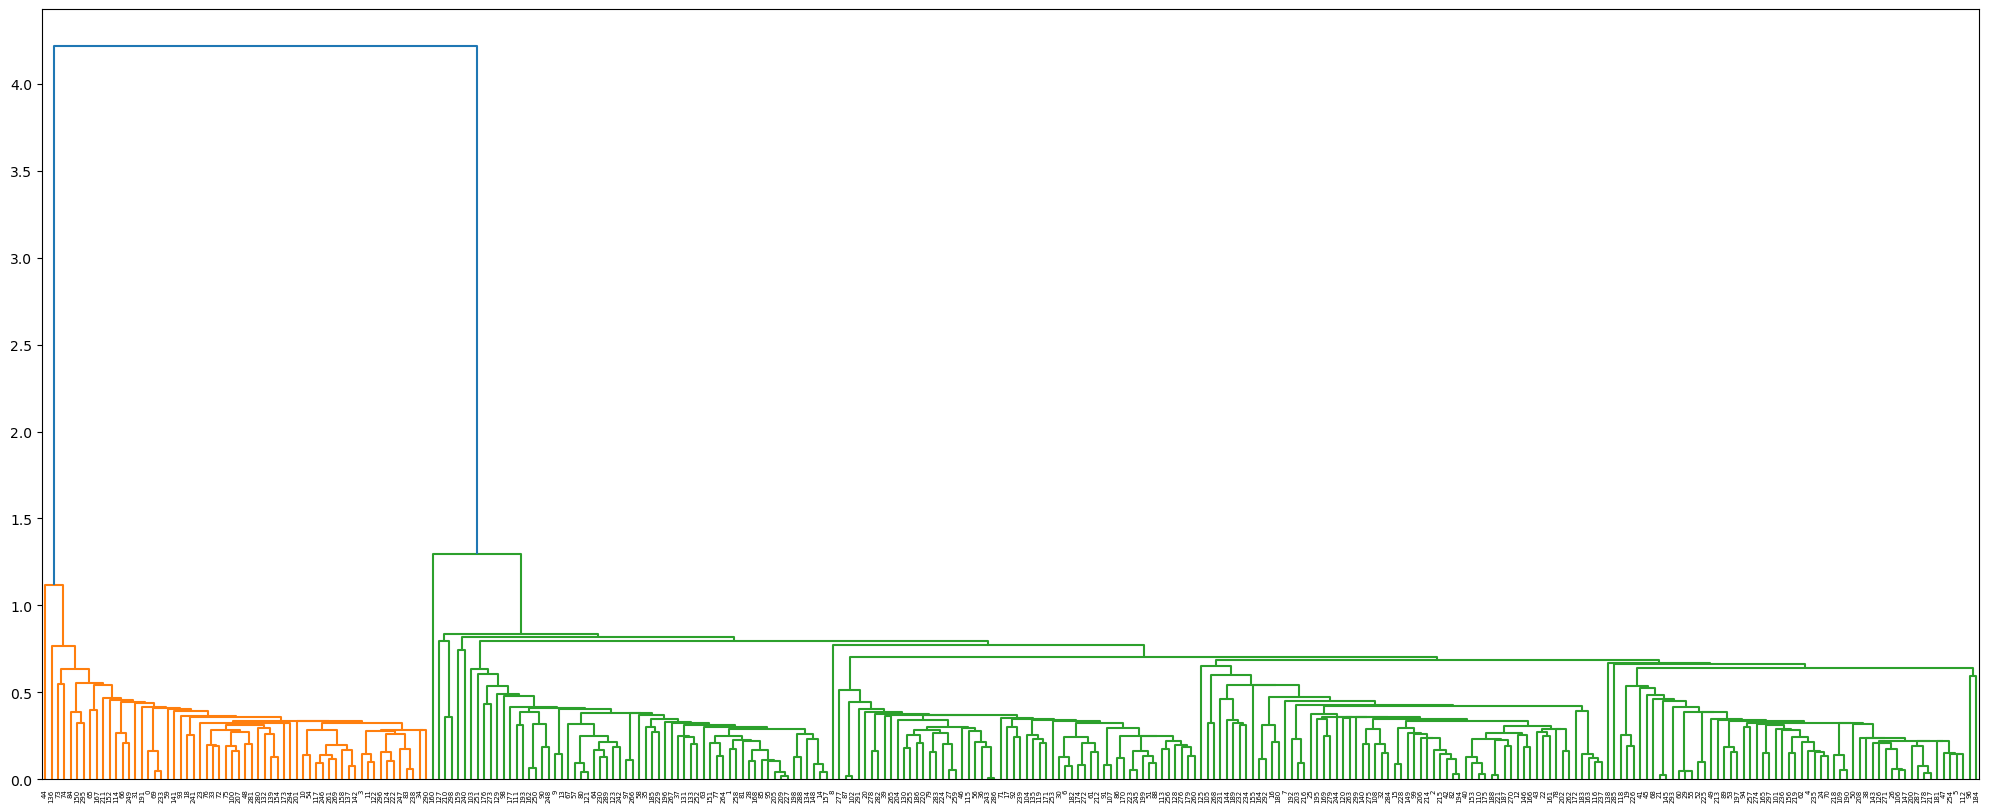

In [285]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

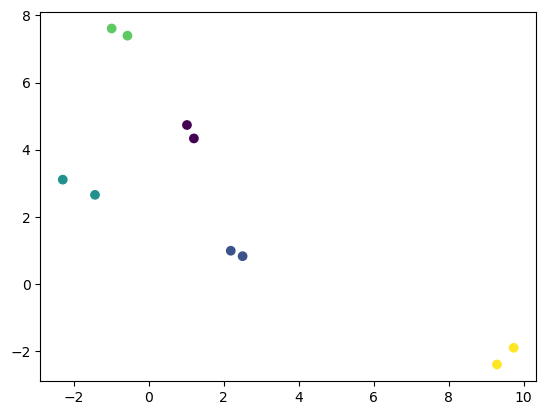

In [286]:
X, y_true = make_blobs(n_samples=10, centers=5,
                       cluster_std=0.3, random_state=0)

plt.scatter(X[:,0],X[:,1],c=y_true)
plt.show()



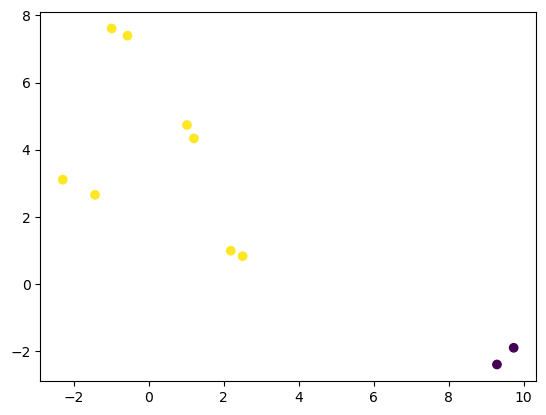

Inertia:  68.90532796502276


In [287]:
clf = KMeans(n_clusters=2)
clf.fit(X)
# print(clf.cluster_centers_.shape)
plt.scatter(X[:,0],X[:,1],c=clf.labels_)
# plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],c='red',marker='*')
plt.show()
print("Inertia: ",clf.inertia_)

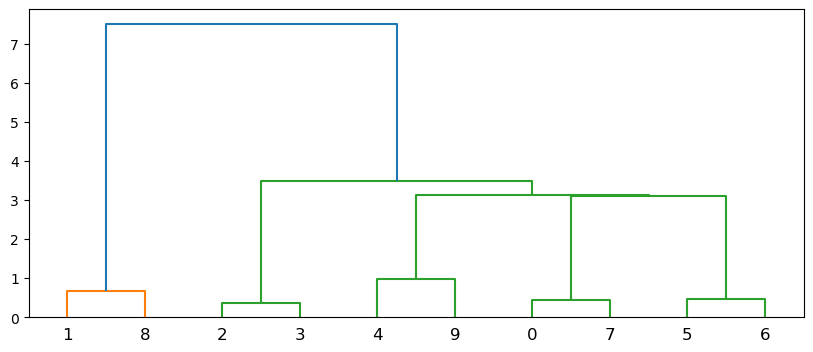

In [288]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(10, 4))
dn = dendrogram(Z)
plt.show()

Agglomerative clustering

In [289]:
data = pd.read_csv('shopping_data.csv')   
df = pd.DataFrame(data)
data = df.drop(df.columns[[0, 1, 2]],axis = 1)


In [290]:
X = np.array(data.values.tolist())

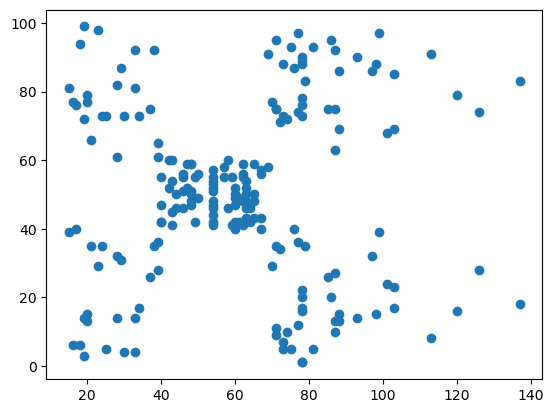

In [291]:
plt.scatter(X[:,0],X[:,1])
plt.show()

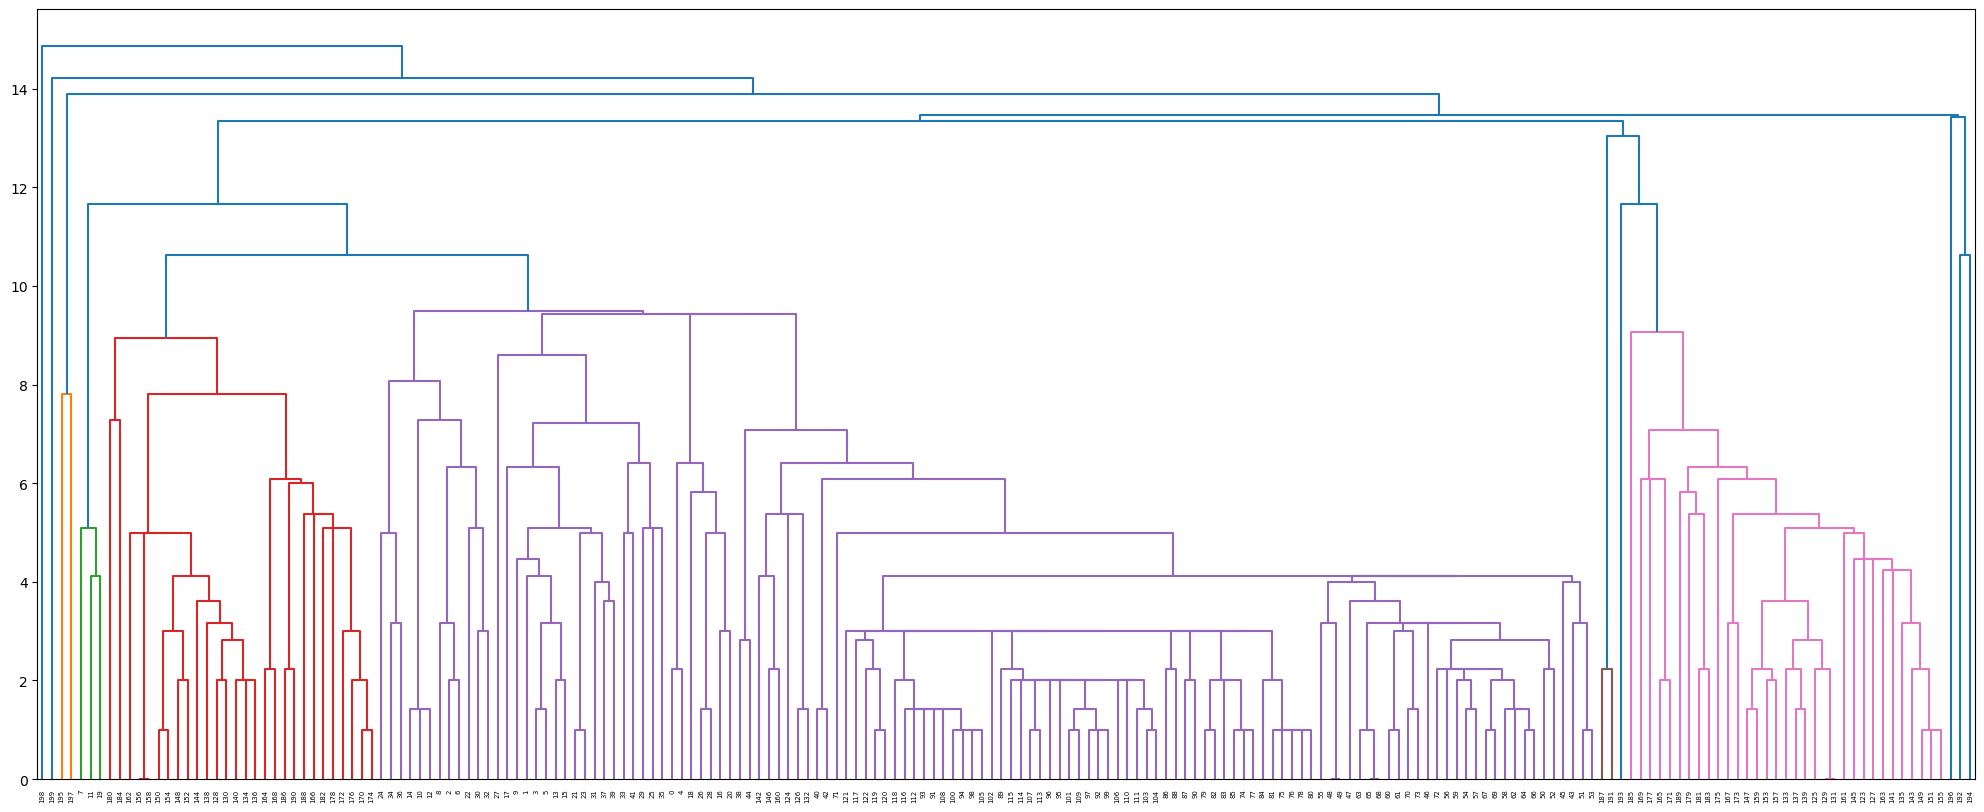

6


In [292]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()
print(len(set(dn['color_list']))-1)

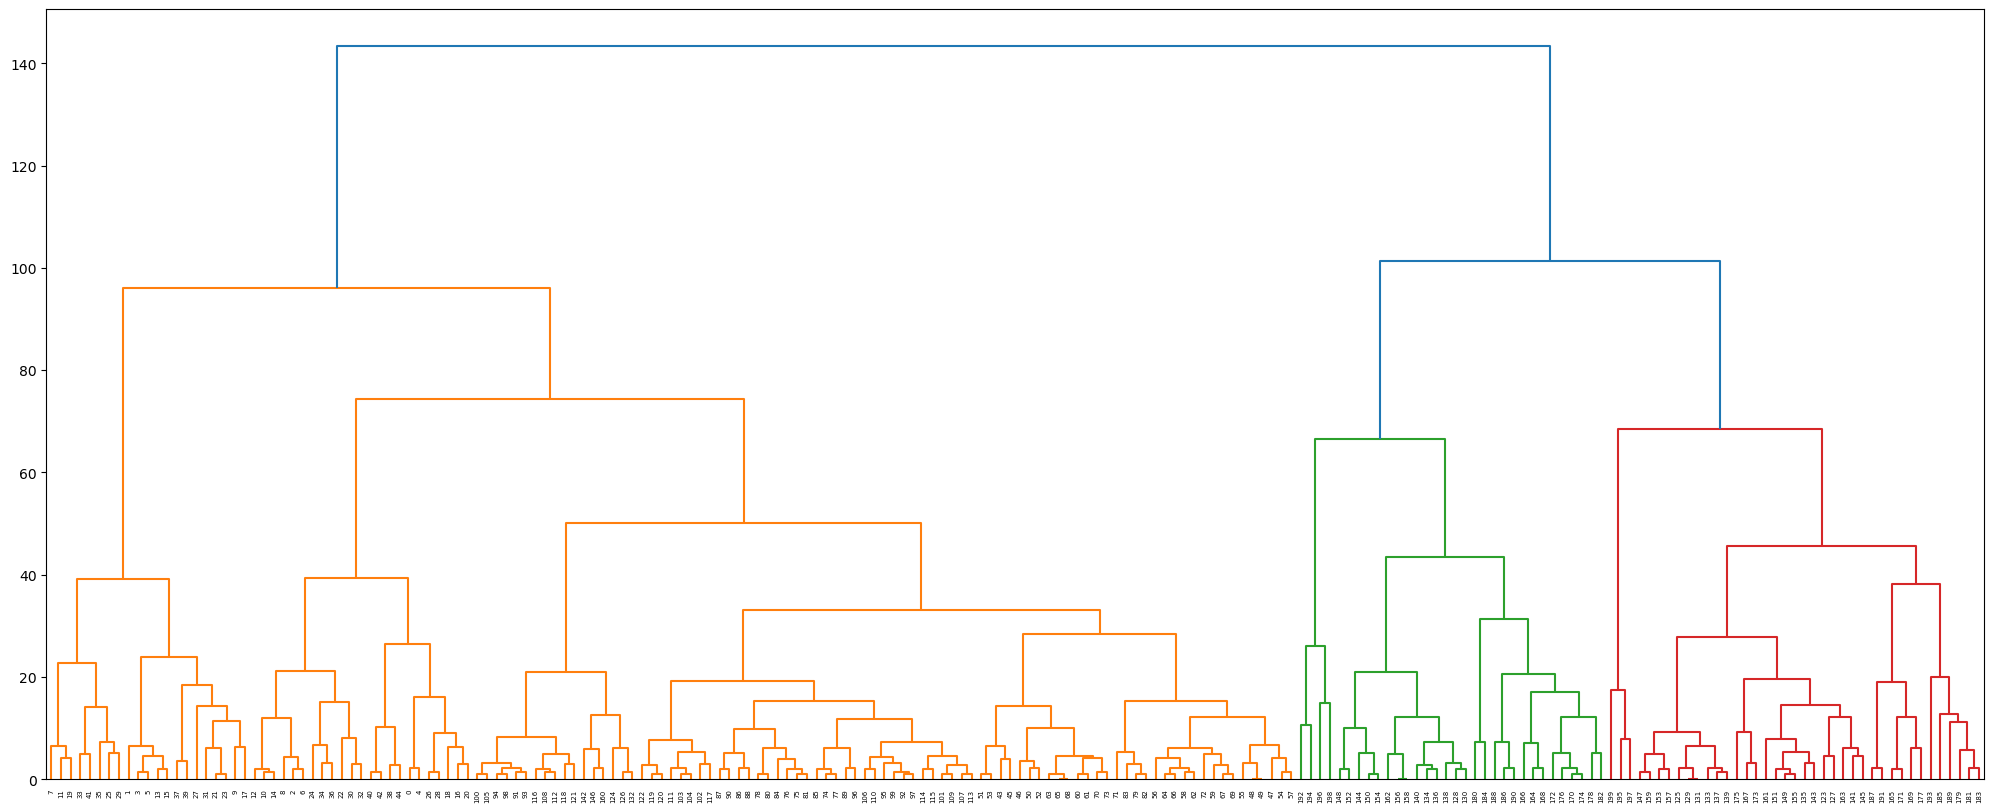

3


In [293]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()
print(len(set(dn['color_list']))-1)

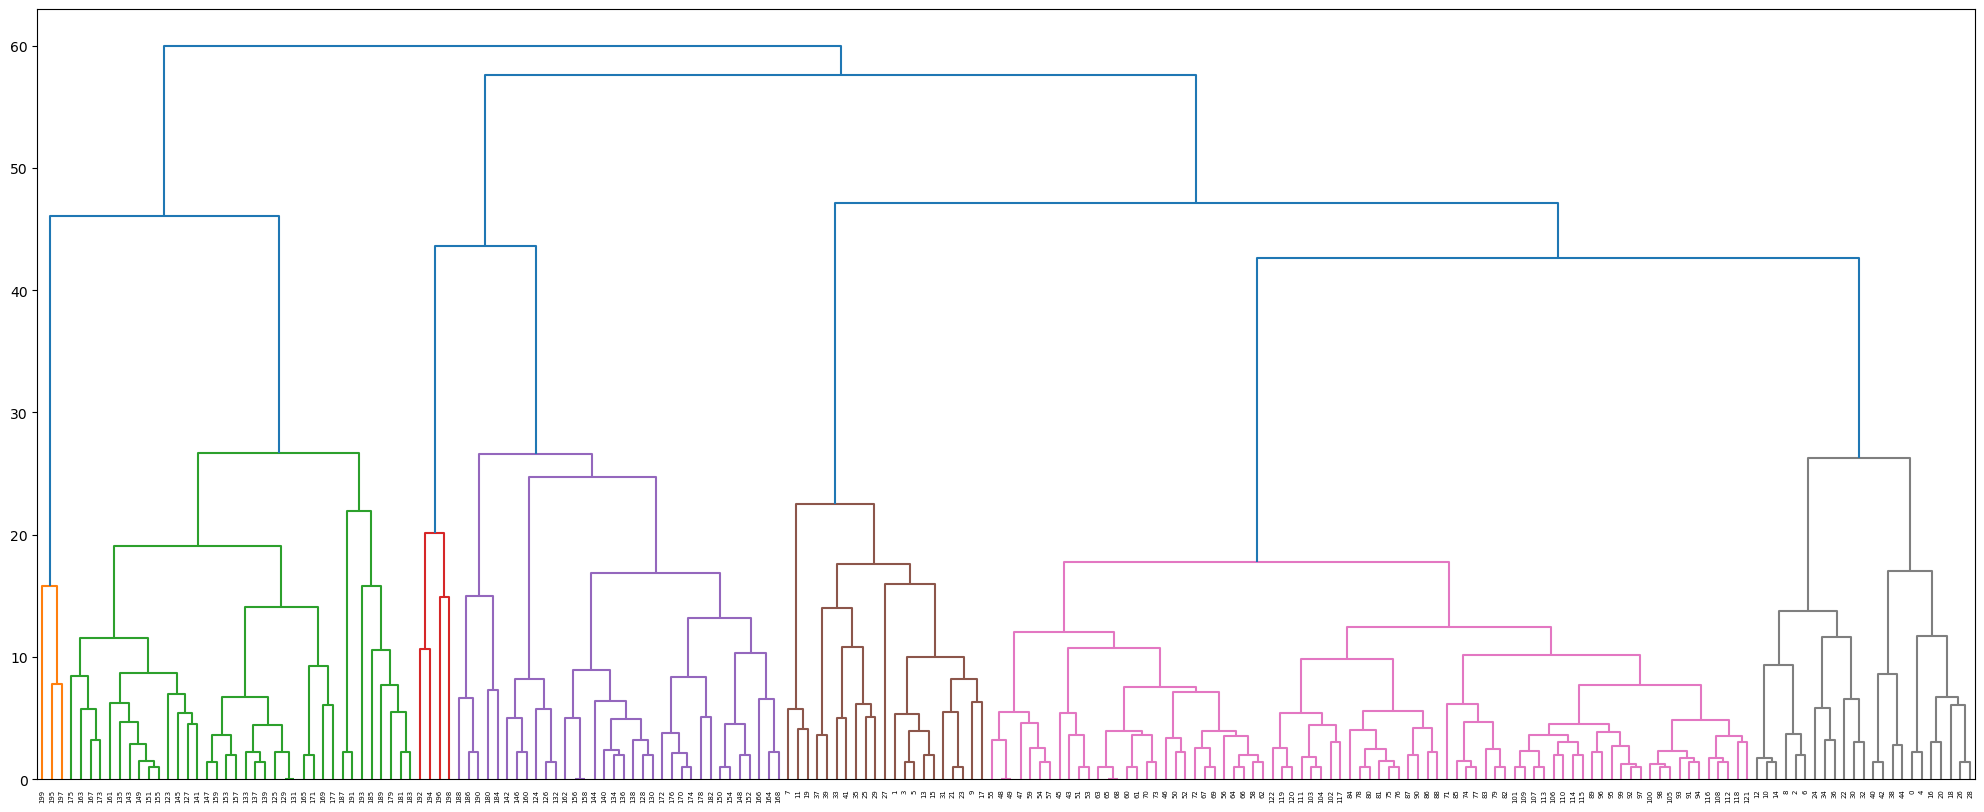

7


In [294]:
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()
print(len(set(dn['color_list']))-1)

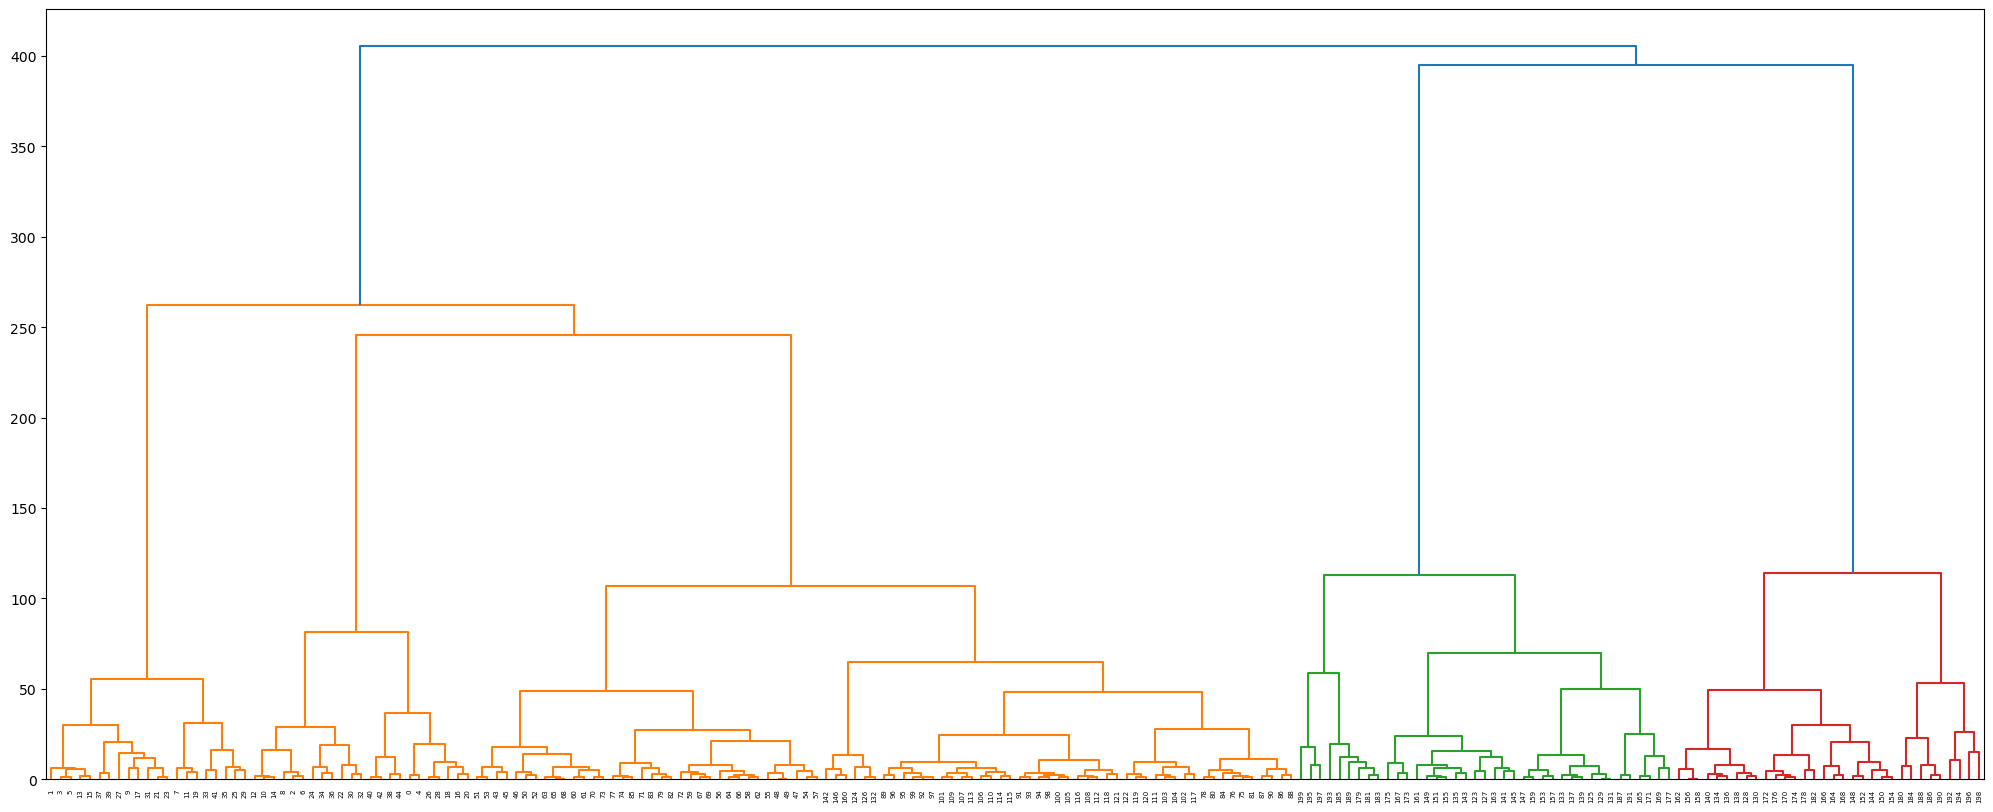

3


In [295]:
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()
print(len(set(dn['color_list']))-1)

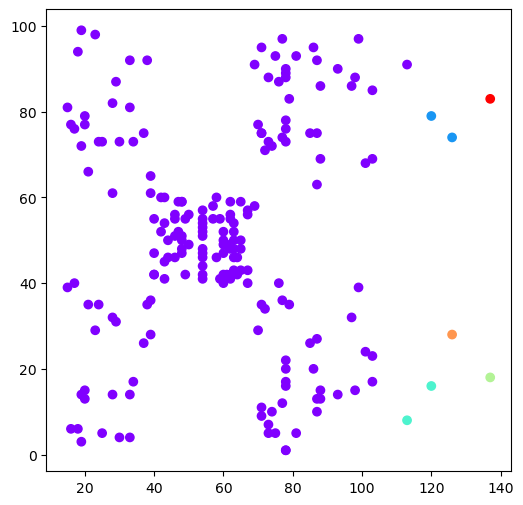

In [300]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, linkage='single')  
plt.figure(figsize =(6, 6))
plt.scatter(X[:,0],X[:,1],c = cluster.fit_predict(X), cmap ='rainbow')
plt.show()


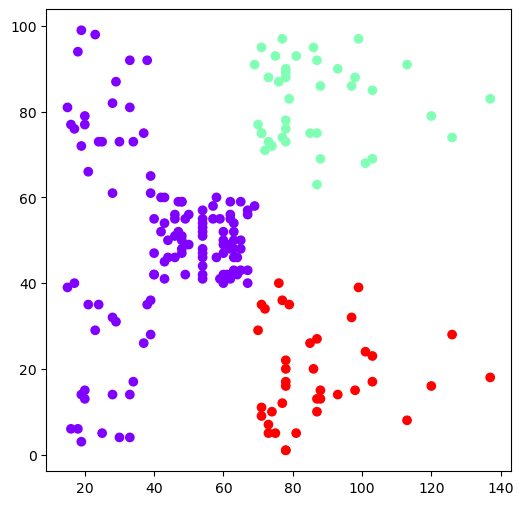

In [301]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='average')  
plt.figure(figsize =(6, 6))
plt.scatter(X[:,0],X[:,1],c = cluster.fit_predict(X), cmap ='rainbow')
plt.show()

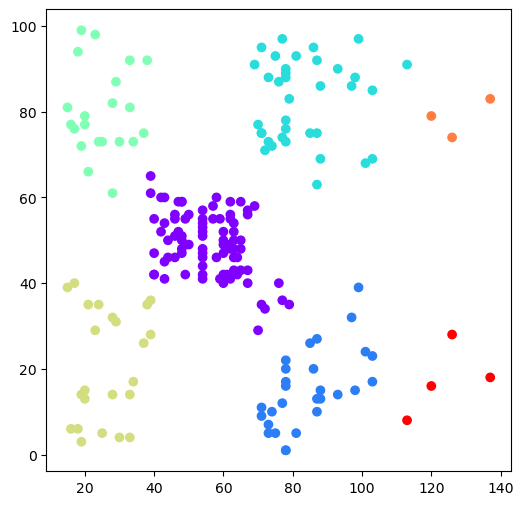

In [302]:
cluster = AgglomerativeClustering(n_clusters=7, linkage='complete')  
plt.figure(figsize =(6, 6))
plt.scatter(X[:,0],X[:,1],c = cluster.fit_predict(X), cmap ='rainbow')
plt.show()

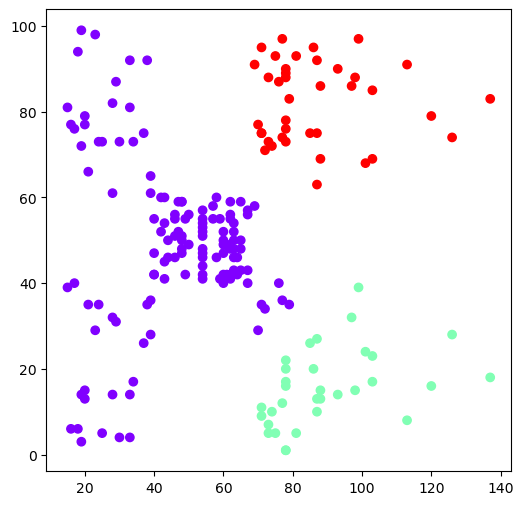

In [303]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  
plt.figure(figsize =(6, 6))
plt.scatter(X[:,0],X[:,1],c = cluster.fit_predict(X), cmap ='rainbow')
plt.show()

Selecting the number of clusters with silhouette analysis on KMeans clustering

In [312]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

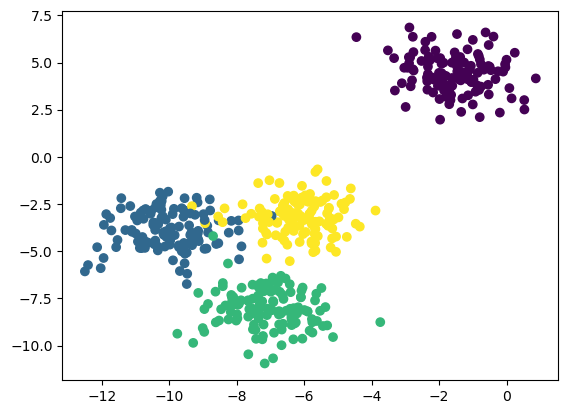

In [313]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Silhouette Score(n= 2): 0.7049787496083261
Silhouette Score(n= 3): 0.5882004012129721
Silhouette Score(n= 4): 0.6505186632729437
Silhouette Score(n= 5): 0.5743946554642042
Silhouette Score(n= 6): 0.4504281968733957
Silhouette Score(n= 7): 0.3782331838774372
Silhouette Score(n= 8): 0.326160182102297
Silhouette Score(n= 9): 0.33944448920673975
Silhouette Score(n= 10): 0.3404863952109302
Silhouette Score(n= 11): 0.3414807397949132
Silhouette Score(n= 12): 0.3530064334467349
Silhouette Score(n= 13): 0.35121564955574563
Silhouette Score(n= 14): 0.34736822860365485
Silhouette Score(n= 15): 0.34559040647672207
Silhouette Score(n= 16): 0.35406559023271456
Silhouette Score(n= 17): 0.34711025880997665
Silhouette Score(n= 18): 0.33959983694190327
Silhouette Score(n= 19): 0.3450723352132518
Silhouette Score(n= 20): 0.3397296063069683


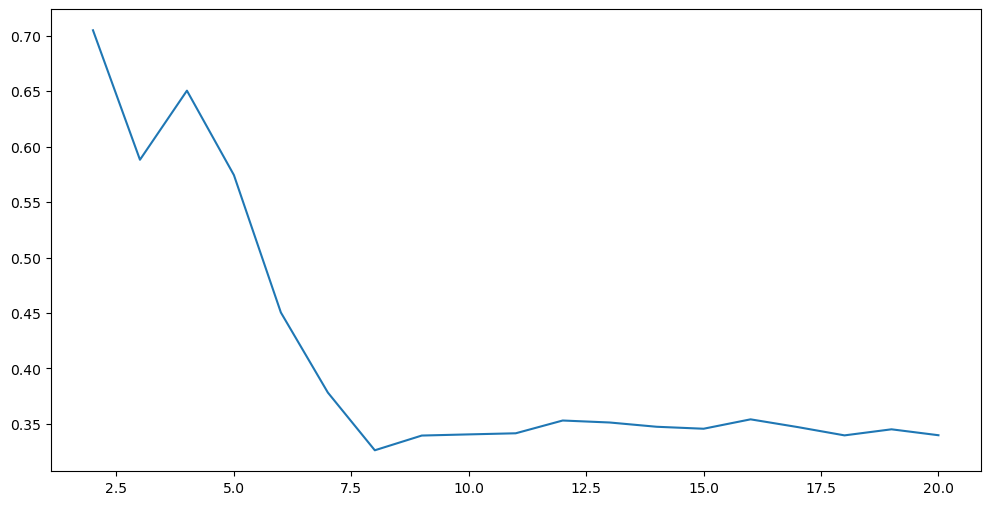

In [322]:
from sklearn.metrics import silhouette_samples, silhouette_score

score = []

for i in range(2,21):
    clf = KMeans(n_clusters=i,init='k-means++')
    clf.fit(X)
    label = clf.predict(X)
    score.append(silhouette_score(X, label))
    print(f'Silhouette Score(n= {i}): {silhouette_score(X, label)}')

plt.figure(figsize =(12, 6))
plt.plot(range(2,21),score)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901
For n_clusters = 6 The average silhouette_score is : 0.43582979891562834


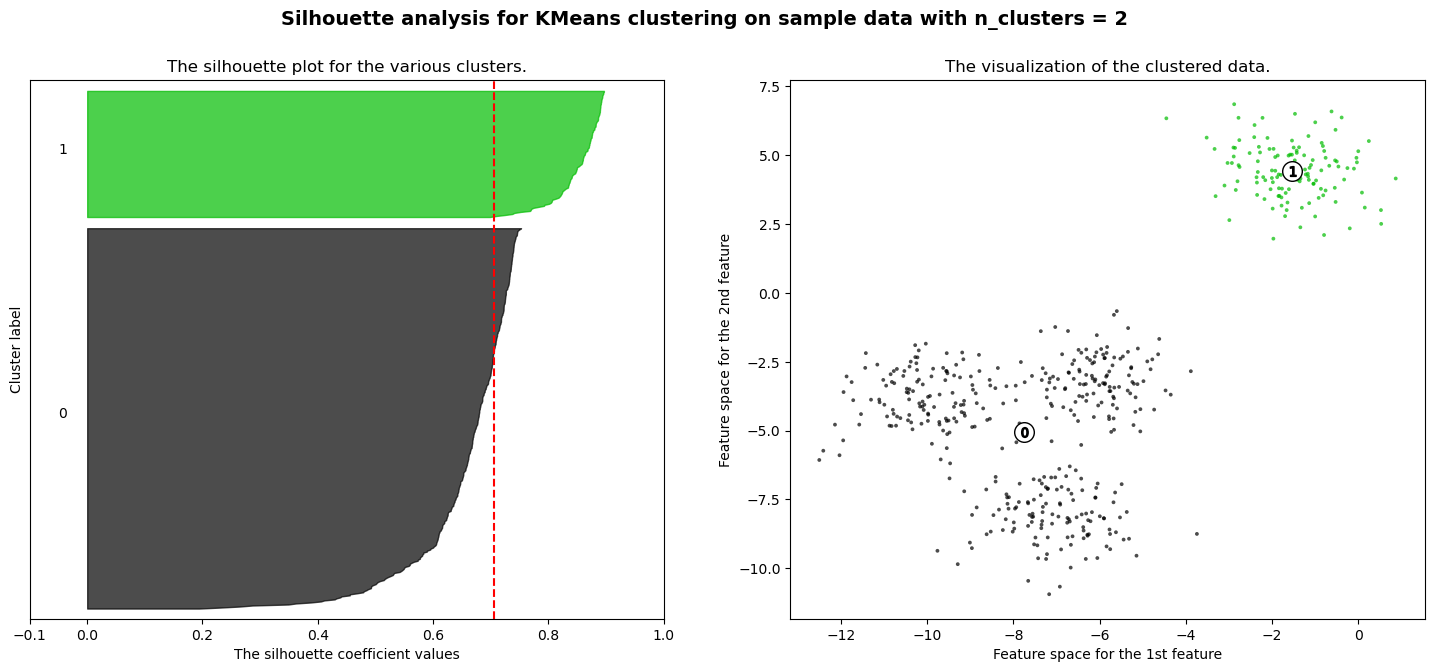

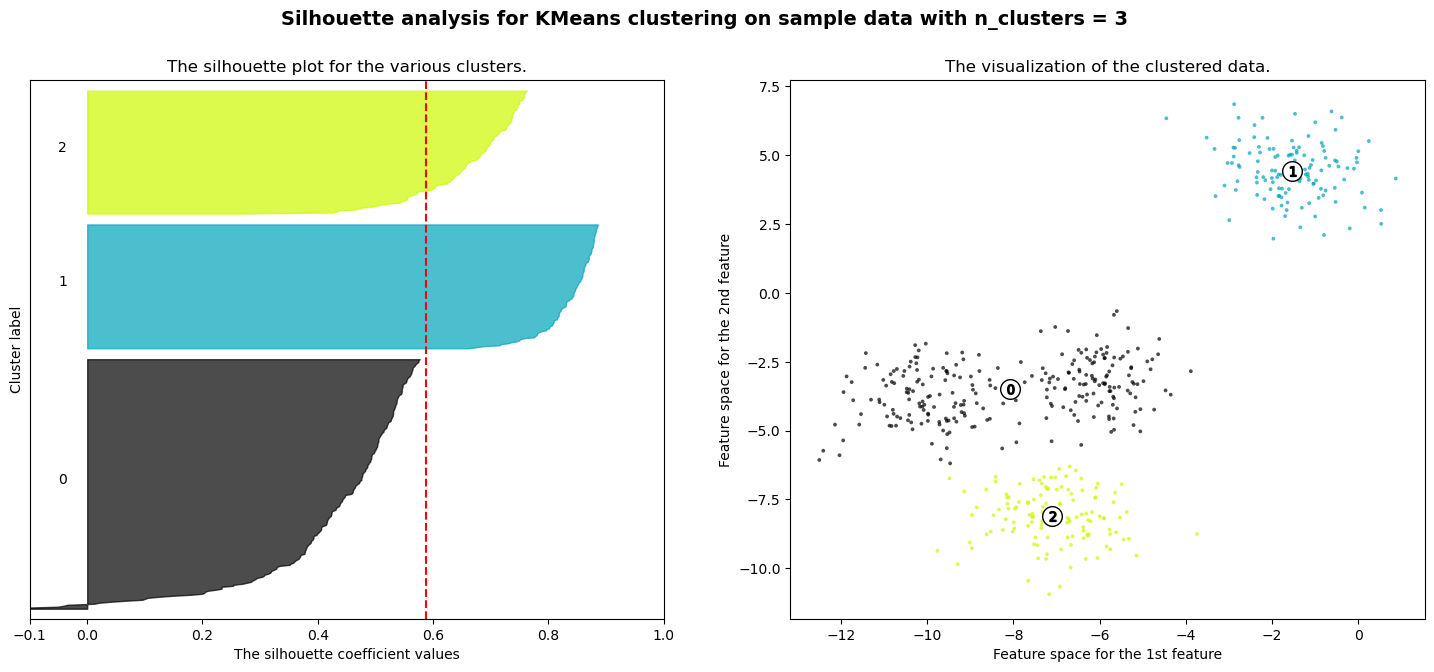

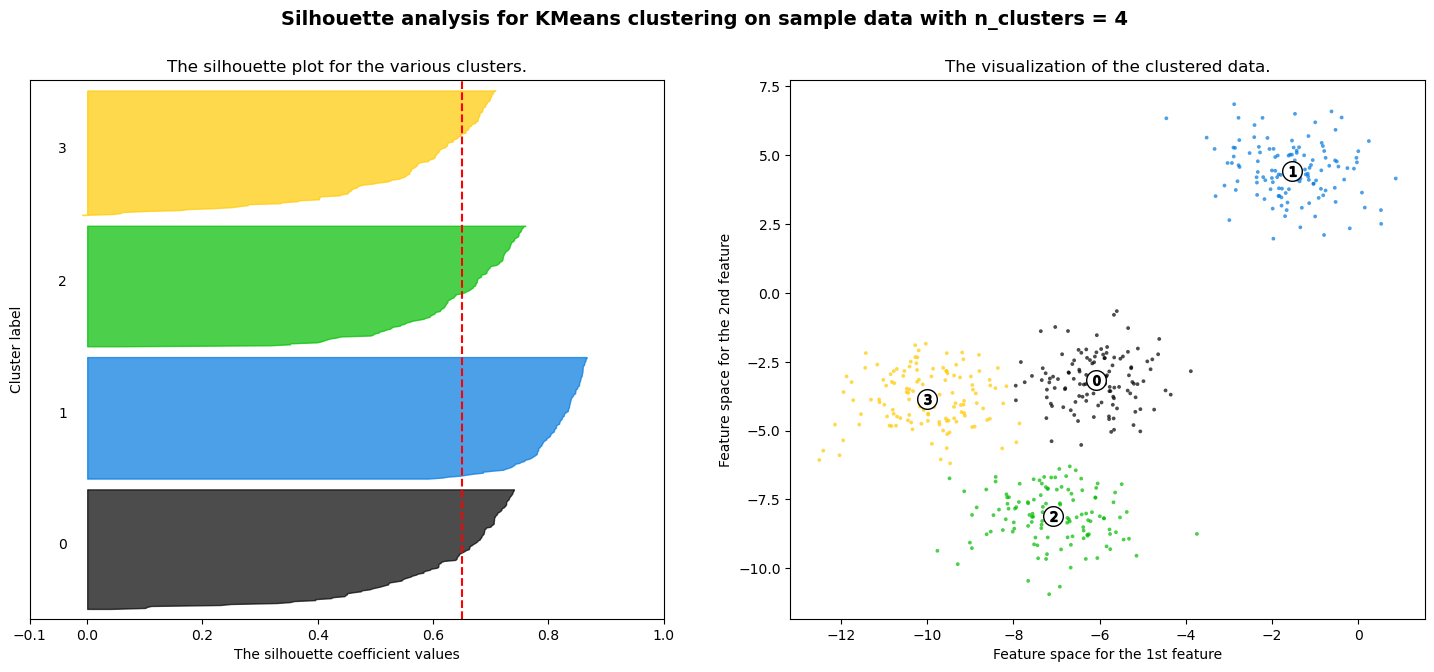

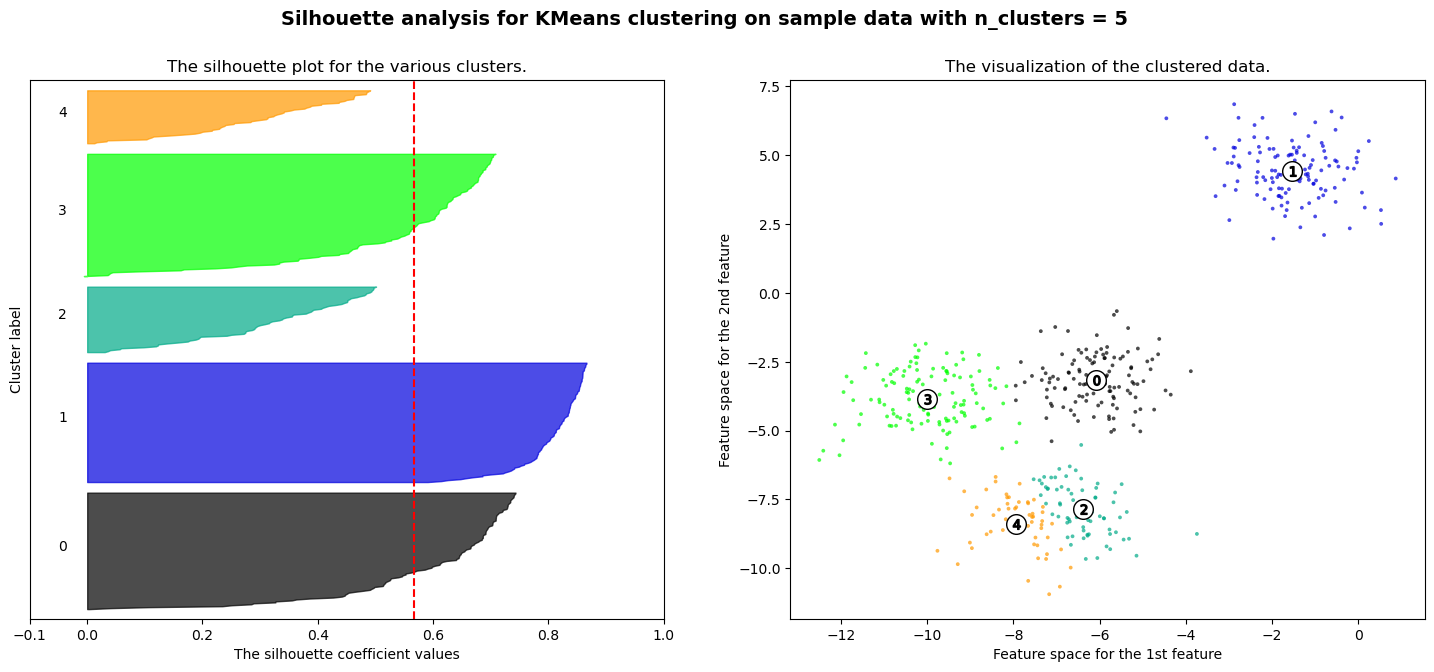

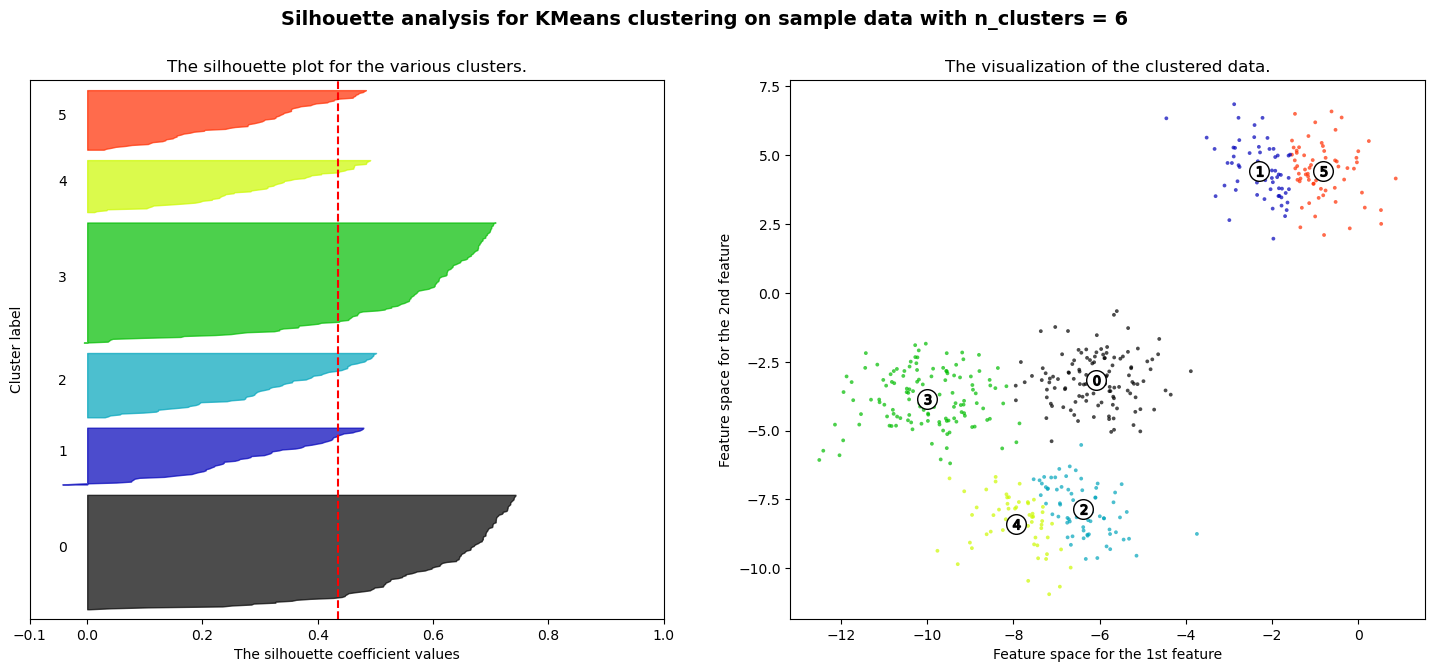

In [320]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**DBSCAN - density based clusterring**

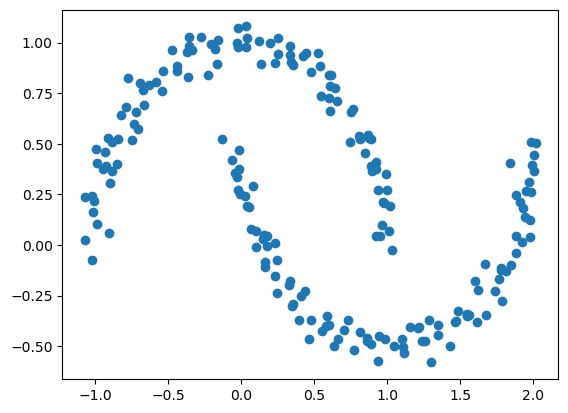

In [323]:
from sklearn.datasets import make_blobs, make_moons, make_circles
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.show()

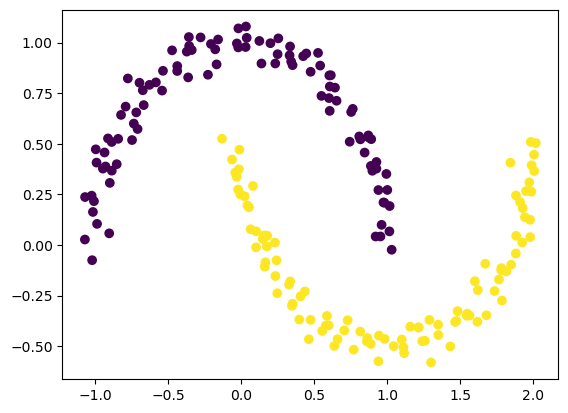

In [342]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.22, min_samples=8).fit(x)
plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_, label=y)
plt.show()